The deliverable for this milestone is a Jupyter notebook showing an example image or images of a satellite dataset read in using Rasterio and a demonstration of a function that carries out manipulation of that image using Keras and TensorFlow 2.0. That manipulation could be anything that alters the image, such as its size, geometry (shape), pixel intensities, or spatial projection. This will mostly test your understanding of Keras syntax, which is an essential component of the remaining milestones.

## Import libraries

In [49]:
import rasterio
import glob
import os
import wget
import tensorflow as tf
from IPython.display import Image
import keras

## Opening satellite file

Opening file and visualizing the image profile

In [12]:
wget.download ('https://lp-prod-resources.s3.us-west-2.amazonaws.com/106/example_TCI_10m.jp2') #file already downloaded
with rasterio.open('example_TCI_10m.jp2', driver='JP2OpenJPEG') as dataset:
    array = dataset.read(1)
    print(dataset.profile)

100% [...............] 135223654 / 135223654{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32642), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 4700040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'interleave': 'pixel'}


In [15]:
def write_image(input, output, band):
    with rasterio.open(input) as src_dataset:
        with rasterio.open('example_TCI_10m.jp2', driver='JP2OpenJPEG') as dataset:
            array = dataset.read(band)
        # Get a copy of the source dataset's profile. Thus our
        # destination dataset will have the same dimensions,
        # number of bands, data type, and georeferencing as the
        # source dataset.
        kwds = src_dataset.profile

        # Change the format driver for the destination dataset to
        # 'GTiff', short for GeoTIFF.
        kwds['driver'] = 'GTiff'

        # Add GeoTIFF-specific keyword arguments.
        kwds['tiled'] = True
        kwds['blockxsize'] = 256
        kwds['blockysize'] = 256
        kwds['photometric'] = 'YCbCr'
        kwds['compress'] = 'JPEG'

        with rasterio.open(output, 'w', **kwds) as dst_dataset:
            # Write data to the destination dataset.
            dst_dataset.write(array.astype(rasterio.uint8), 1)

In [24]:
file_list = ['r1.tif', 'r2.tif', 'r3.tif']
[write_image('example_TCI_10m.jp2',f, band) for f,band in zip(file_list, [1,2,3])]

[None, None, None]

## Original Image

Load Image

In [112]:
img = tf.keras.utils.load_img('r1.tif')

Visualizing Image

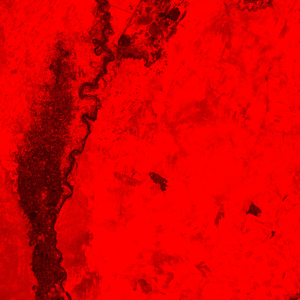

In [113]:
sat_image = img.resize([300, 300])
sat_image

## Satellite Image Manipulation

Change Image brightness

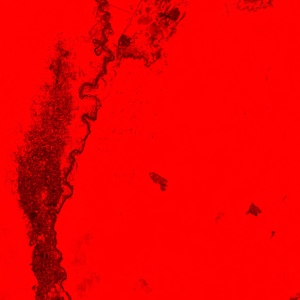

In [114]:
img=tf.image.adjust_brightness(
    img, delta=0.3)
new_image=tf.keras.utils.array_to_img(img)
sat_image2 = new_image.resize([300, 300])
sat_image2